# Workshop 18: Looking for Extremes

In [1]:
import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

import scipy         # Another numerical library
from scipy import integrate
from scipy import optimize
from matplotlib import rc

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

## Why Extremize?

In our daily lives, we often look to optimize things. For example, you might decide how to allocate your time so that you get the best grade possible, or find the fastest way to get from campus to your favorite hawker center. Most of the optimization problems involve finding an *extreme* solution: the cheapest ticket or shortest distance.

In physical processes, we generally look to minimize certain values. For those of you who have taken (or will take) Classical Mechanics, you will recall that we try to minimize the action $S$ to determine the dynamics of the system. We also know that physical systems prefer to have the smallest energy possible, so we use minimization there to obtain the stable system configuration (take Quantum Mechanics to get a feel for the variational method). 

If the function that we want to minimize is simple enough, of course we should do it by hand. However, it happens that the function is too messy and numerical approach is the way to go. In this class, we will generally stick to the functions that can be solved by hand to check our numerical results.

### Question 1

Consider a function $y(x) = (x - 0.123)^2$. We know that the minimum is at $0.123$. If you weren't as clever as y'all are, how would you find this minimum? Try to write a function (or several, if needed) that takes a mathematical function and finds its minimum (assume there is only one, for simplifity).

In [2]:
def my_find_minimum(f, tolerance):
    step = 1
    x = 0
    move_right = True

    if f(x) > f(x + step):
        move_right = True
        x = x + step
    elif f(x) > f(x - step):
        move_right = False
        x = x - step

    while step > tolerance:
        if move_right:
            if f(x) > f(x + step):
                x = x + step
            else:
                move_right = False
                step = step / 2
        else:
            if f(x) > f(x - step):
                x = x - step
            else:
                move_right = True
                step = step / 2
        
    return x, f(x)

In [3]:
def find_minimum(f, tolerance):
    s = 1 
    x = 0 
    while abs(s) > tolerance:
        f_curr = f(x)
        f_new = f(x + s)
        if f_new < f_curr:
            x = x + s
        else:
            x = x + s
            s = -s / 2
    return x, f(x)

In [4]:
find_minimum((lambda x: (x - 0.123)**2), 1e-4)

(0.1229248046875, 5.654335021972389e-09)

In [2]:
def side(f, x, epsilon):
    return np.sign(f(x + epsilon) - f(x))

def step_1D(f, x, epsilon, step):
    x_new = x + step
    if side(f, x_new, epsilon) == side(f, x, epsilon):
        if f(x_new) > f(x):
            return x_new, -step
        else:
            return x_new, step
    else:
        return x_new, -step/2

def find_min_1D(f, x_0, step, tol):
    x = x_0 
    while abs(step) > tol:
        x, step = step_1D(f, x, tol, step)
    return x

In [4]:
find_min_1D((lambda x: (x - 0.123)**2), 1, 5, 1e-5)

0.12298202514648438

### Question 2

So we know how 1D works. Think of how we would do a similar thing for two dimensions. As a concrete example, take

$$
F\left(x,y\right) = -\exp\left[-\left(x-\sqrt{1/5}\right)^2 - 3y^2\right]\,.
$$

Plot the function first so you get a feeling where the minimum should be. How would you proceed with finding it?

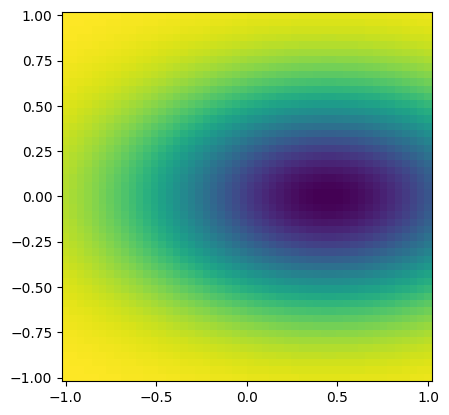

In [5]:
def fn(x, y):
    return -np.exp(-(x - np.sqrt(1/5))**2 - 3 * y**2)

nPts = 50
xs, ys = np.mgrid[-1:1:1j * nPts, -1:1:1j * nPts]
profile = fn(xs, ys)

fig, ax = plt.subplots(1, 1)
ax.pcolormesh(xs, ys, profile)
ax.set_aspect("equal")

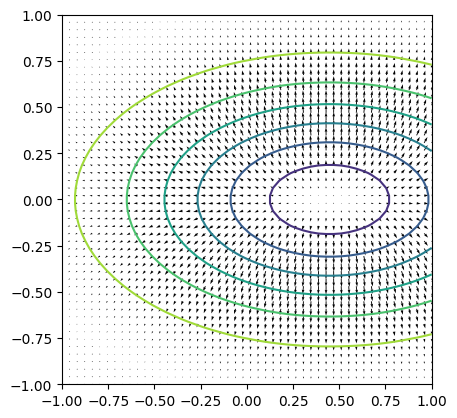

In [6]:
Ex, Ey = np.gradient(profile)

fig, ax = plt.subplots(1, 1)
ax.contour(xs, ys, profile)
ax.quiver(xs, ys, Ex, Ey)
ax.set_aspect("equal")

In [17]:
def gradient(f, x, y, epsilon):
    df_x = (f(x + epsilon, y) - f(x, y))/epsilon
    df_y = (f(x, y + epsilon) - f(x, y))/epsilon
    return np.array([df_x, df_y])

def step_2D(f, x, y, tol):
    g = gradient(f, x, y, tol)
    h = lambda z: f(x - (z * g[0]), y - (z * g[1]))
    z = find_min_1D(h, 0, 1, tol)
    x_new = x - z * g[0]
    y_new = y - z * g[0]
    return x_new, y_new

def find_min_2D(f, x_0, y_0, tol):
    x, y = x_0, y_0
    # x = x_0
    # y = y_0
    grad = gradient(f, x, y, tol)
    xs = np.array([x])
    ys = np.array([y])
    while np.sqrt(grad[0]**2 + grad[1]**2) > tol:
        # print(x, y)
        # print(np.sqrt(grad[0]**2 + grad[1]**2))
        x, y = step_2D(f, x, y, tol)
        grad = gradient(f, x, y, tol)
        xs = np.append(x, xs)
        ys = np.append(y, ys)
    return x, y, xs, ys

In [18]:
res = find_min_2D(fn, -1, -1, 1e-2)

0.04176553260206625
0.7789646821967131
0.8496830936079663
1.4118082369926501
1.463830806864826
1.4803939209424553
1.4837098471134464
1.482493206772006
1.480281609853339
1.478106838648952
1.476420642136208
1.475198532002103
1.4743412188327778
1.473750420348862
1.47334750752552
1.473074479879428
1.472890212313183
1.4727661722325567
1.4726828159245662
1.4726268620656342
1.4725893301564692
1.4725641674135908
1.4725473029242315
1.4725360025307515
1.4725284315775657
1.4725233597418947
1.4725199623047278
1.4725176865853082
1.4725161622753444
1.472515141290363
1.4725144574421174
1.4725139994096397
1.472513692627346
1.4725134871506491
1.4725133495267841
1.4725132573494635
1.4725131956112627
1.472513154260509
1.4725131265647815
1.4725131080148628
1.4725130955905892
1.4725130872691232
1.4725130816956147
1.4725130779626117
1.472513075462345
1.472513073787729
1.472513072666104
1.4725130719148827
1.4725130714117185
1.4725130710747325
1.472513070849013
1.472513070697823
1.4725130705965817
1.472513070

KeyboardInterrupt: 

[Text(0.5, 0, '$x$'), Text(0, 0.5, '$y$')]

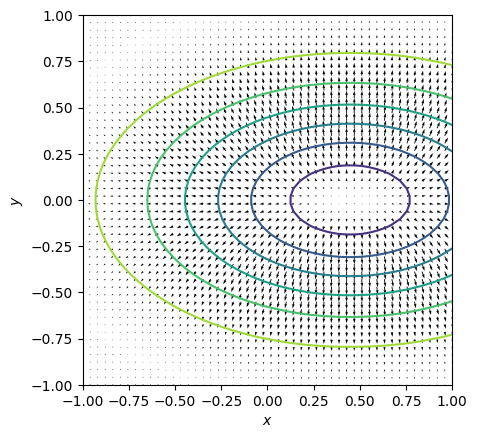

In [76]:
fig, ax = plt.subplots(1, 1)
ax.quiver(xs, ys, Ex, Ey)
ax.contour(xs, ys, profile)
ax.plot(res[2], res[3])
ax.set_aspect("equal")
ax.set(xlabel = "$x$", ylabel = "$y$")

## Seeing Through Noise

Consider a system exhibiting a regular variation in time $x\left(t\right) = \sin 2\pi t$. When we measure this system, we take data points at discrete values of $t \in \left\{t_1, t_2, \dots t_N\right\}$. The resultant values of $x \in \left\{x_1, x_2, \dots x_N\right\}$ that we get have noise so that generally $x_i \neq \sin 2\pi t_i$:

Using the available noisy data, we would like to extract the underlying behavior. The simplest approach is to look for a linear regression. To this end, we state the the solution should take the following form

$$
f\left(t\right)  = w_0 + \sum_{i = 1}^M w_it^i\,,
$$

where $w_i$ are some unknown *weights* that we need to determine.

To calculate the weights, we define an *error function*

$$
E = \frac{1}{N}\sum_{n=1}^N\left[f\left(t_n\right) - x_n\right]^2\,.
$$

We will want to minimize this error function to obtain the weights that will (hopefully) capture the behavior of the function without the noise.

### Fit quality

It is important to assess the quality of our fit not only by checking how well it agrees with the *training* data, but also how well it does with the *test* set.